### Importing data and processing

In [1]:
import pandas as pd 

df = pd.read_csv("student-scores_01.csv")

print("score head")
df.head()

print(f"rows: {df.shape[0]}, columns: {df.shape[1]}")

print(f"Data Info:")
print(df.info())

score head
rows: 2000, columns: 18
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  ch

### Label encoding


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['part_time_job'] = le.fit_transform(df["part_time_job"])
df['extracurricular_activities'] = le.fit_transform(df["extracurricular_activities"])

df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,0,3,0,27,Lawyer,73,81,93,97,63,80,87,574
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,0,2,0,47,Doctor,90,86,96,100,90,88,90,640
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,0,9,1,13,Government Officer,81,97,95,96,65,77,94,605
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,0,5,0,3,Artist,71,74,88,80,89,63,86,551
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,0,5,0,10,Unknown,84,77,65,65,80,74,76,521


### Featuring Scaling

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ['absence_days', 'total_score', 'weekly_self_study_hours']

x = df[features]
print(x.head())
y = df['part_time_job']

x_scaled = scaler.fit_transform(x)
# y_scaled = scaler.transform()
# print(x_scaled)

   absence_days  total_score  weekly_self_study_hours
0             3          574                       27
1             2          640                       47
2             9          605                       13
3             5          551                        3
4             5          521                       10


### train_test_split 

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

x_train, y_train

(array([[-0.63360395,  0.5235309 , -0.96940019],
        [-1.39446129,  1.20935341,  0.76233423],
        [-0.63360395, -2.92923074, -1.29925436],
        ...,
        [ 0.12725339, -0.70621982,  0.59740714],
        [ 0.50768206, -0.99000845, -0.63954601],
        [ 2.40982542, -1.27379708, -1.21679082]], shape=(1600, 3)),
 968     0
 240     0
 819     1
 692     1
 420     0
        ..
 1130    0
 1294    0
 860     0
 1459    1
 1126    0
 Name: part_time_job, Length: 1600, dtype: int64)

### Metrics Analysis

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("classification report")
print(classification_report(y_test,y_pred))

print("connfusion matrix")
print(confusion_matrix(y_test, y_pred))

classification report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       338
           1       0.67      0.03      0.06        62

    accuracy                           0.85       400
   macro avg       0.76      0.51      0.49       400
weighted avg       0.82      0.85      0.78       400

connfusion matrix
[[337   1]
 [ 60   2]]


### Plots here

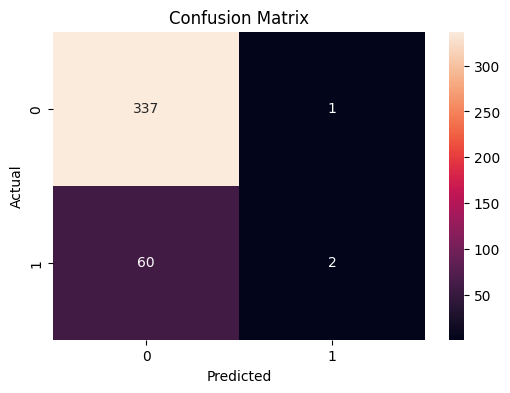

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show() 



### User Input 

In [11]:
### If user do a Part Time Job or !

print("---- Predict Your Job----")
try:
    study_hours = float(input("Enter Your Weekly study hours: "))
    absence_days = float(input("Enter Your absence days: "))
    # extracurricular_activities = float(input("Enter Your extracurricular activities (1 or 0): "))
    total_score = float(input("Enter Your total score: "))

    user_data_df = pd.DataFrame([{
        'absence_days' : absence_days,
        # 'extracurricular_activities' : extracurricular_activities,
        'total_score' : total_score,
        'weekly_self_study_hours' : study_hours
    }])

    print(user_data_df)

    user_data_scaled = scaler.transform(user_data_df)

    user_pred = model.predict(user_data_scaled)[0]

    print(f"you {'do' if user_pred == 1 else 'do not'} have a part time job")

except Exception as e:
    print(f"error occured: {e}")

---- Predict Your Job----
error occured: could not convert string to float: 'e2'
